In [5]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/ASUS/Desktop/Customer-Churn-Records.csv"
data = pd.read_csv(file_path)

# Display the structure of the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int6

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13620\3683433352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Exited", palette="coolwarm")


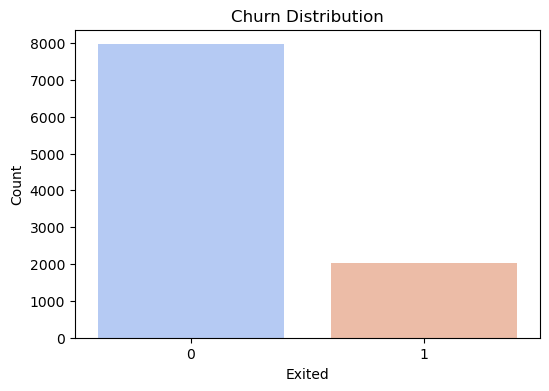

Statistical summary of numerical columns:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584   

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Exited", palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

# Statistical summary
print("Statistical summary of numerical columns:")
print(data.describe())

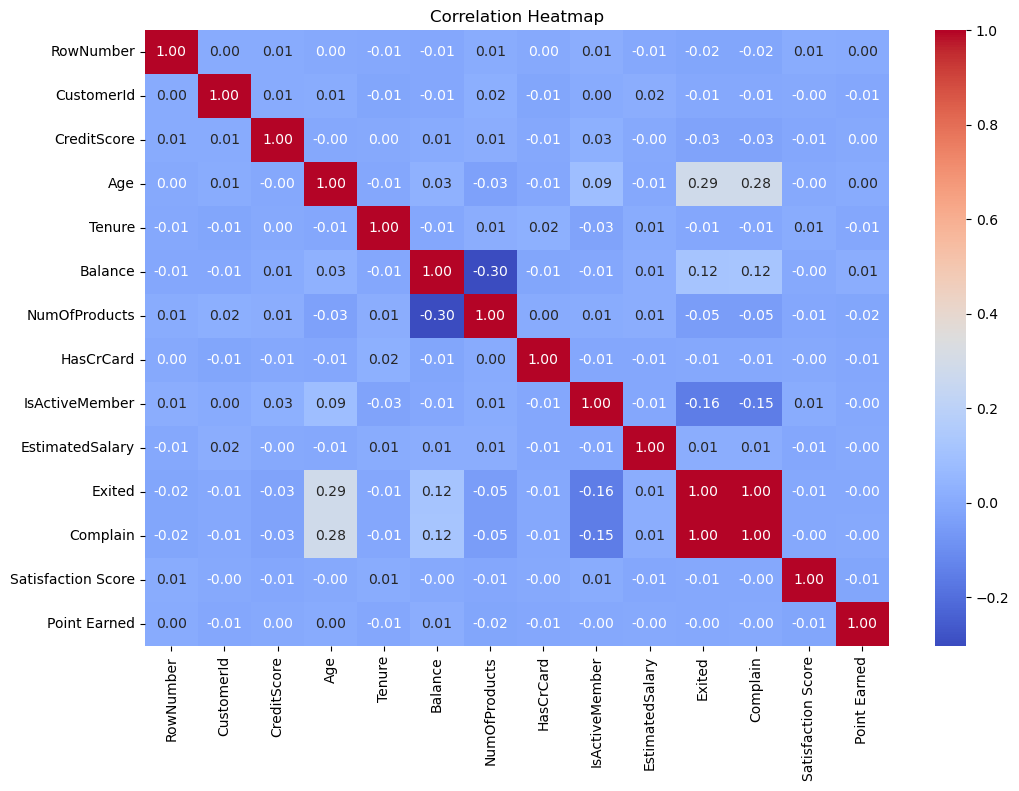

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns only
numeric_data = data.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Check for NaN values in the correlation matrix
if correlation_matrix.isnull().any().any():
    print("NaN values detected in the correlation matrix. Dropping columns with NaN correlations.")
    correlation_matrix = correlation_matrix.dropna(axis=0, how="any").dropna(axis=1, how="any")

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13620\432598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="coolwarm")


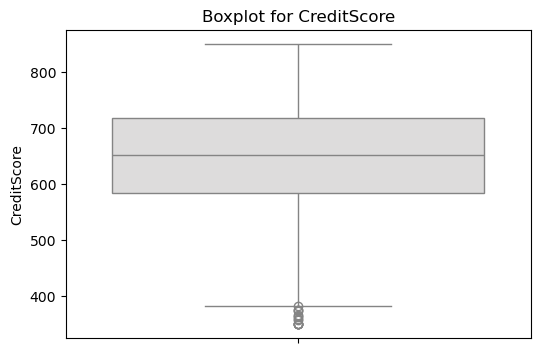

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13620\432598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="coolwarm")


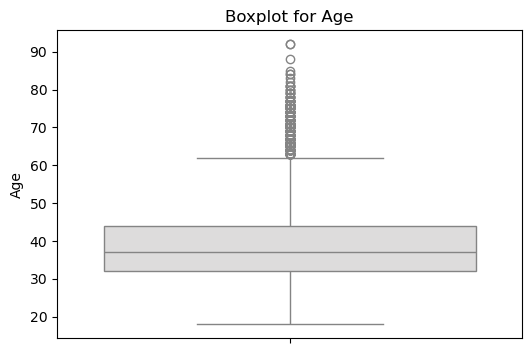

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13620\432598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="coolwarm")


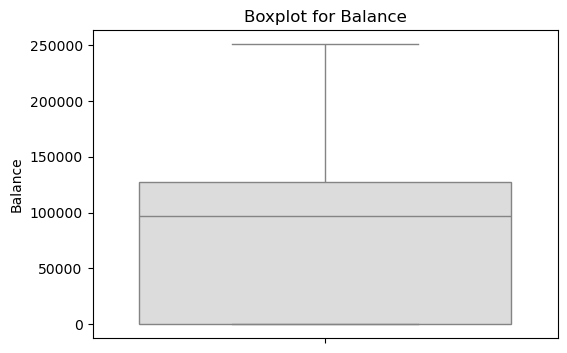

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13620\432598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette="coolwarm")


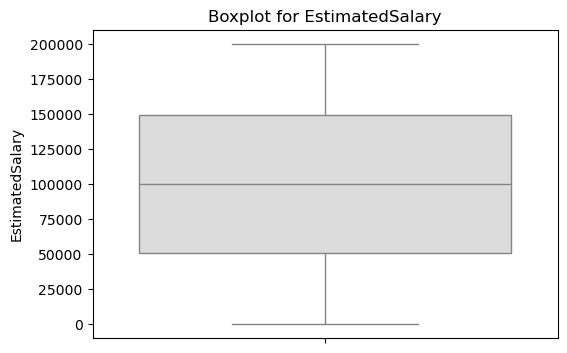

Outliers detected per column: {'CreditScore': 15, 'Age': 359, 'Balance': 0, 'EstimatedSalary': 0}


In [13]:
# Boxplots to visualize outliers
numerical_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, y=col, palette="coolwarm")
    plt.title(f"Boxplot for {col}")
    plt.show()

# Detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each column
outlier_summary = {col: len(detect_outliers(data, col)) for col in numerical_cols}
print("Outliers detected per column:", outlier_summary)
